
## Practice
1. Input images from red_blood_cell.jpg.
2. Use morphological filters to remove noise.
3. Use <i>cv2.HoughCircles()</i> to detect circles.
4. Count automatically how many cells in the image.
5. Optional:Use <i>cv2.ConnectedComponents()</i> to show each circle using different color.
6. Use <i>cv2.putText()</i> to write the number of cells on the upper left corner.
7. Show the output image.

In [42]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('red_blood_cell.jpg', cv2.IMREAD_GRAYSCALE)
#cv2.imshow('original', img)
kernel = np.ones((9, 9), np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

#cv2.imshow('Closing', img)


circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, 10, param1=120,param2=17,minRadius=0,maxRadius=11)[0]



dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
count = 0
for c in circles:
    cv2.circle(dbg_img, (c[0], c[1]), c[2], (0, 255, 0), 1)
    count +=1
#cv2.putText(dbg_img,str(count), (10,50), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
cv2.imshow('circles', dbg_img)


dbg_img = cv2.cvtColor(dbg_img, cv2.COLOR_BGR2GRAY)
num_labels, labels = cv2.connectedComponents(dbg_img)
output = np.zeros((dbg_img.shape[0], dbg_img.shape[1], 3), np.uint8)
for i in range(0, num_labels):
    mask = labels == i
    for j in range(i):
        output[:, :, :][mask] = tuple(np.random.choice(range(255),size=3))
cv2.putText(output,str(count), (10,50), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
cv2.imshow('count with different color', output)
cv2.waitKey()
cv2.destroyAllWindows()


<ipython-input-42-9eb3b7707fe7>:21: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(dbg_img, (c[0], c[1]), c[2], (0, 255, 0), 1)


### Output example
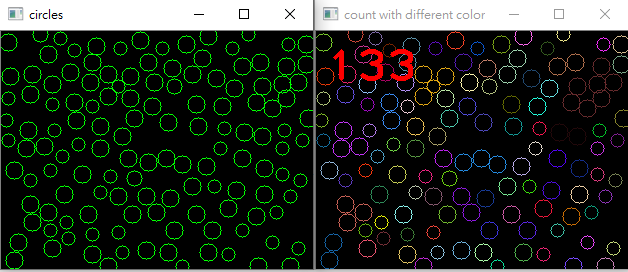